<a href="https://colab.research.google.com/github/KabyZon/pattern-recognition/blob/master/k_means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import sys

#Generacion de datos o eleccion de datasets reales

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving faithful.csv to faithful.csv


In [ ]:
# importar dataset desde pc
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['faithful.csv']))
# Dataset is now stored in a Pandas Dataframe
X = df.values

In [ ]:
#importar dataset de scikit
iris = datasets.load_iris()
X = iris.data

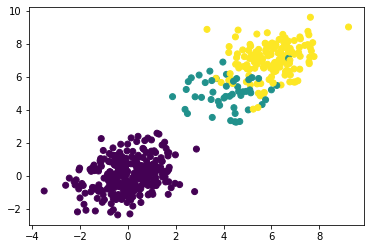

In [4]:
#Dataset Sintetico


mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 300) 
 
mean_02 = np.array([4.0, 5.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
np.random.seed(42)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 50) 
 
mean_03 = np.array([6.0, 7.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
np.random.seed(42)
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 150) 
   
 
distTodas = [dist_01.shape[0],dist_02.shape[0],dist_03.shape[0]]

dataSintetico = np.vstack((dist_01, dist_02, dist_03)) #, dist_04)) 
labelOriginal = np.zeros((dataSintetico.shape[0], ) ,dtype=np.float64)
clase = 0
count = 0
for d in distTodas:
  for i in range(count,d+count):
    labelOriginal[i] = clase
    count = count + 1
  clase = clase +1
np.random.seed(42)
np.random.shuffle(dataSintetico)
np.random.seed(42) 
np.random.shuffle(labelOriginal)
   
def plot(data, centroids): 
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
      
    plt.legend() 
    plt.xlim(-5, 12) 
    plt.ylim(-10, 15) 
    plt.show() 
 
plt.scatter(dataSintetico[:, 0], dataSintetico[:, 1],c = labelOriginal)


Text(0, 0.5, 'y')

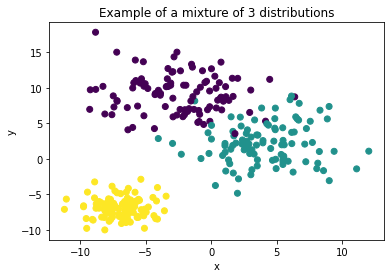

In [21]:
#dataset isotropica
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
varInicial = [3, 3, 1.5]
centers = [[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959]]
X, truth = make_blobs(n_samples=300, centers=centers, 
                      cluster_std = varInicial)   
plt.scatter(X[:, 0], X[:, 1], c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y")

#K-Means

In [6]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    dif = (X - mu).T
    exponente = np.exp(-0.5 * np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif))
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * exponente).reshape(-1, 1)

In [28]:
#INICIALIZACION K MEANS++ from gees for geeks

def distance(p1, p2): 
    return np.sum((p1 - p2)**2) 
   
def initPP(data, k): 
    ''' 
    initialized the centroids for K-means++ 
    inputs: 
        data - numpy array of data points having shape (200, 2) 
        k - number of clusters  
    '''
    ## initialize the centroids list and add 
    ## a randomly selected data point to the list 
    centroids = [] 
    centroids.append(data[np.random.randint( 
            data.shape[0]), :]) 
    #plot(data, np.array(centroids)) 
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
       # plot(data, np.array(centroids)) 
    return centroids 
   


In [8]:
def kDatosAleatorios(X,cant_clases):
  datosAleatorios = []
  for i in range(cant_clases):
    datosAleatorios.append(X[random.randint(0,X.shape[0])])
  return datosAleatorios

In [9]:
#inicializar 
import random
def inicializar(X, cant_clases):
    labels =  [0]*X.shape[0]
    #muInit  = kDatosAleatorios(X,cant_clases)       #inicializacion de k datos aleatorios
    muInit = initPP(X,cant_clases)                   #inicializacion k-means++
    cluster= ({ 'mu_k': muInit,"labels" : labels })
        
    return cluster

In [10]:
def expectation(X,cluster):
    
    mu_k = cluster['mu_k'] 
        
    for i in range(0,X.shape[0]):
        allDist = []
        for mu in mu_k:
            dist = (np.linalg.norm(X[i]- mu ))**2
            allDist.append(dist)
        cluster['labels'][i] = allDist.index(min(allDist))
    return cluster

In [11]:
def maximization(X,cluster):
    mu_k = cluster['mu_k'] 
    labels = cluster['labels']
   
    for i in range(0,len(mu_k)):
        acum =  np.zeros(X[0].shape)
        cant = 0
        for j in range(0,len(labels)):
                if(labels[j] == i):
                    acum += X[j]
                    cant = cant +1
        mu_k[i] = acum/ cant
    
    cluster['mu_k'] = mu_k
    return cluster                    

In [14]:
from copy import copy

def train(X,cant_clases,cant_iteraciones):
    
    cluster= inicializar(X,cant_clases)
    print(cluster["mu_k"])
    
    #history = []
    convergio = False
    for i in range(0,cant_iteraciones):
        
        muprevio = copy(cluster['mu_k'])
        cluster = expectation(X,cluster)
        cluster = maximization(X,cluster)
        if(i%2==0):
          plt.scatter(X[:, 0], X[:, 1], c = cluster['labels'])
          plt.title(f"Dataset Old-Faithful, iteracion {i}")
          plt.show()
        #history.append(cluster['mu_k'])
        
        cota = 0
        for k in range(0,len(muprevio)):
          cota += (np.linalg.norm(cluster['mu_k'][k]- muprevio[k] ))**2
        cota = cota / len(muprevio)
        if ( not(convergio) and cota < 10**-50) :
          print(f"Convergio en {i} iteraciones ")

          print(cota)
          break
    return cluster

[array([-3.48983996,  7.36144179]), array([-9.48622182, -9.80193486]), array([11.10710833, -1.42118938])]


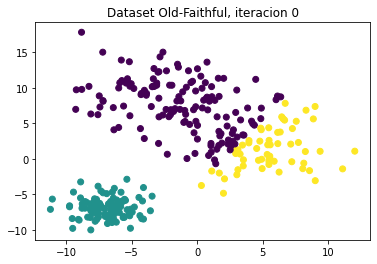

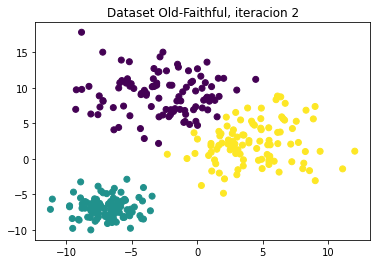

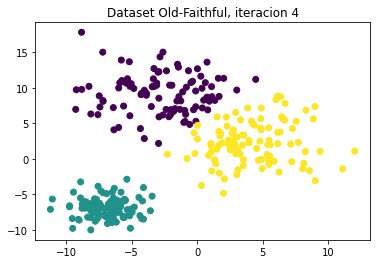

Convergio en 4 iteraciones 
0.0


In [29]:
cluster = train(X,3,50)

#Resultados Scikit vs. Nuestra implementación



In [30]:
from sklearn.mixture import GaussianMixture

n_clusters = 3
iteraciones = 50

sk = KMeans(n_clusters=3).fit(X)

print('Resultados sklearn:\n', sk.cluster_centers_ )
print('Rsultados propios:\n', np.array([cluster['mu_k']]))

Resultados sklearn:
 [[ 4.25503618  2.22367491]
 [-6.85439846 -6.90041679]
 [-2.78059747  9.16199177]]
Rsultados propios:
 [[[-2.78059747  9.16199177]
  [-6.85439846 -6.90041679]
  [ 4.25503618  2.22367491]]]
